In [1]:
from sklearn.datasets import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss

In [2]:
data=load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
df = pd.DataFrame(np.c_[data.data, data.target],columns=np.append(data.feature_names,['target']))

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
df.target.unique()

array([0., 1.])

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

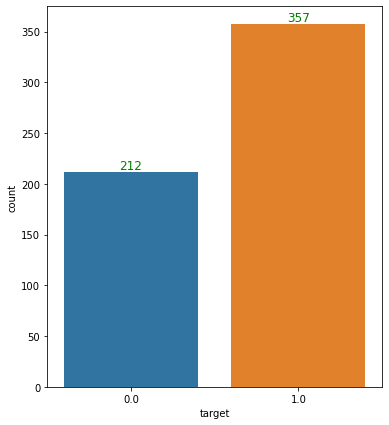

In [10]:
plt.figure(figsize=(6,7))
cnt_plt = sns.countplot(df.target)
for p in cnt_plt.patches:
    cnt_plt.text(x=(p.get_x() + p.get_width()/2.), y=p.get_height(), s=int(p.get_height()), 
    fontsize=12, color='green', ha='center', va='bottom')
plt.show()


In [11]:
X = df.iloc[:,:-1]
y = df['target'].values

In [12]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
std = StandardScaler()
scaled_data = std.fit_transform(X)

In [15]:
pca = PCA()
reduced_data = pca.fit_transform(scaled_data)

In [16]:
reduced_df = pd.DataFrame(reduced_data)

In [17]:
reduced_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


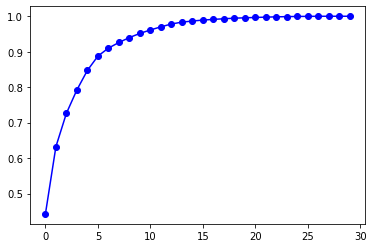

In [18]:

plt.plot(range(30),pca.explained_variance_ratio_.cumsum(),'bo-')
plt.show()

In [19]:
pca = PCA(n_components=6)
features = pca.fit_transform(scaled_data)

In [20]:
features_df = pd.DataFrame(features)

In [21]:
features_df.head()

,0,1,2,3,4,5
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452
3,7.122953,10.275589,-3.232789,0.152547,-2.960879,3.053422
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,y,test_size=0.3,random_state=42)
X_train.shape,y_train.shape

((398, 6), (398,))

In [23]:
X_train = X_train.T   # The "-1" makes reshape flatten the remaining dimensions
X_test = X_test.T
y_train = y_train.reshape(y_train.shape[0], -1).T
y_test = y_test.reshape(y_test.shape[0], -1).T

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6, 398) (6, 171) (1, 398) (1, 171)


In [44]:
class Two_Layer_Model:
    
    def __init__(self,layer_dims):
        self.layers=layer_dims
        self.X = None
        self.y = None
        self.m = None
        self.costs = []
        self.lr=None
        
    def init_weights(self):
        '''Initialise the weigths and bias'''
        self.W1 = 0.10*np.random.randn(self.layers[1],self.layers[0])
        self.b1 = np.zeros((self.layers[1],1))
        self.W2 = 0.10*np.random.randn(self.layers[2],self.layers[1])
        self.b2 = np.zeros((self.layers[2],1))

    def relu(self,Z):
        '''Relu Activation Function'''
        return np.maximum(0,Z)
    
    def sigmoid(self,Z):
        '''Sigmoid Activation Function'''
        return (1/(1+np.exp(-Z)))
    
    def sigmoid_backward(self,Z):
        '''Sigmoid Derivative'''
        s = 1/(1+np.exp(-Z))
        dS = s*(1-s)
        return dS
    
    def relu_backward(self,Z):
        '''Relu Derivative'''
        Z[Z<=0] = 0
        Z[Z>0] = 1
        return Z

    
    def forward_propogation(self,X):
        '''forward pass'''
        self.Z1 = np.dot(self.W1,X)+self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.W2,self.A1)+self.b2
        y_pred = self.sigmoid(self.Z2)
        return y_pred
                
            
    def compute_cost(self,y,y_pred):
        '''compute the entropy loss'''
        cost = -1/self.m * (np.sum(np.multiply(np.log(y_pred), y) + np.multiply((1 - y), np.log(1 - y_pred))))
        return cost
        
    def backward_propogation(self,y_pred):
        #dl/dW2 = dl/dy_pred*dy_pred/dZ2*dZ2/dW2
        #dl/dW1 = dl/dy_pred*dy_pred/dZ2*dZ2/dA1*dA1/dZ1*dZ1/dW1
        #dl/dW1 = dl/dZ2*dZ2/dA1*dA1/dZ1*dZ1/dW1
        #dl.dW1 = dl/dZ1*dZ1/dW1
        
        #loss wrt y_pred
        dl_wrt_y_pred = - (np.divide(self.y, y_pred) - np.divide(1 - self.y, 1 - y_pred))
        #sigmoid dericative
        dl_sig = self.sigmoid_backward(self.Z2)
        #der of loss wrt Z2
        dl_Z2 = dl_wrt_y_pred*dl_sig
        #der of loss wrt W2
        self.dW2 = np.dot(dl_Z2,self.A1.T)/self.m
        #der of loss wrt b2
        self.db2 = np.sum(dl_Z2,axis=1,keepdims=True)/self.m
        dl_A1 = np.dot(self.W2.T,dl_Z2)
        #der of loss wrt Z1
        dl_Z1 = dl_A1*self.relu_backward(self.Z1)
        #der of loss wrt W1
        self.dW1 = np.dot(dl_Z1,self.X.T)/self.m
        self.db1 = np.sum(dl_Z1,axis=1,keepdims=True)/self.m
        
        
    def update_parameters(self):
            self.W1 = self.W1 - self.lr*self.dW1
            self.b1 = self.b1 - self.lr*self.db1
            self.W2 = self.W2 - self.lr*self.dW2
            self.b2 = self.b2 - self.lr*self.db2
        
    def fit(self,X,y,n_iterations=100,learning_rate=0.1):
        self.X = X
        self.y = y
        self.m = X.shape[0]
        self.lr=learning_rate
        self.init_weights()
        
        for i in range(n_iterations):
            y_pred = self.forward_propogation(self.X)
            cost = self.compute_cost(self.y,y_pred)
            self.backward_propogation(y_pred)
            self.update_parameters()
            self.costs.append(cost)
            if i%100==0:
                 print(f'cost afer {i} iteration is {cost:.2f}')
        
    def predict(self, X):
        '''
        Predicts on a test data
        '''
        m = X.shape[1]
        p = np.zeros((1,m))
        prob = self.forward_propogation(X)
        # convert probas to 0/1 predictions
        for i in range(0, prob.shape[1]):
            if prob[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
        return p
#         return np.round(pred)              

                                
    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(np.sum(y == yhat) / y.shape[1] * 100)
        return acc
        
        

In [45]:
n_x = X_train.shape[0] #6
n_h = 4
n_y=y_train.shape[0]#1
layer_dims = [n_x,n_h,n_y]
model = Two_Layer_Model(layer_dims)
model.fit(X_train,y_train,n_iterations=1000,learning_rate=0.001)
y_pred = model.predict(X_test)
acc = model.acc(y_test,y_pred)
print(f'Model Accuracy for Test Set is {acc}%')


cost afer 0 iteration is 46.88
cost afer 100 iteration is 11.51
cost afer 200 iteration is 7.06
cost afer 300 iteration is 5.89
cost afer 400 iteration is 5.49
cost afer 500 iteration is 5.29
cost afer 600 iteration is 5.17
cost afer 700 iteration is 5.09
cost afer 800 iteration is 5.02
cost afer 900 iteration is 4.94
Model Accuracy for Test Set is 99%
